## data available at http://archive.stsci.edu/
## table of labelled data properties available at http://exoplanetarchive.ipac.caltech.edu/

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.io import fits
from scipy.stats import binned_statistic
from scipy.interpolate import splrep, splev, UnivariateSpline, BSpline, InterpolatedUnivariateSpline, LSQUnivariateSpline

In [2]:
data = pd.read_csv('../KOI.csv')

# Data headings

In [3]:
print('data columns:')
data.columns

data columns:


Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [4]:
data.head(10)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0.992,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
8,6721123,K00114.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660
9,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841


In [5]:
data = data.drop(['ra','dec'],axis=1)

# Distributions of data properties...

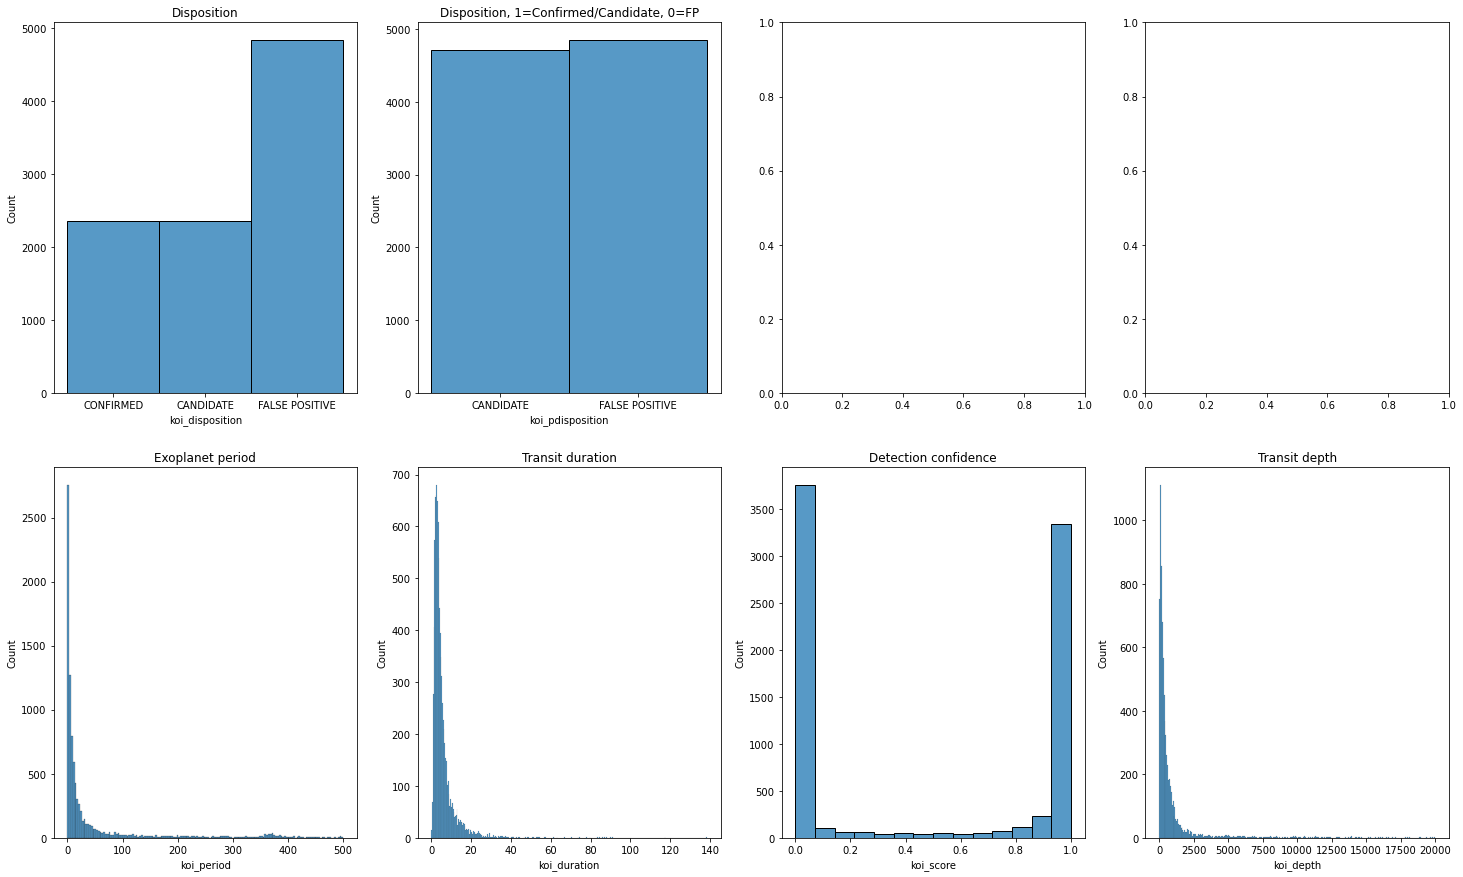

In [6]:
fig, axs = plt.subplots(2,4)
fig.set_figwidth(25)
fig.set_figheight(15)

sns.histplot(data=data.koi_disposition, ax=axs[0,0])
axs[0,0].title.set_text('Disposition')

sns.histplot(data=data.koi_pdisposition, ax=axs[0,1])
axs[0,1].title.set_text('Disposition, 1=Confirmed/Candidate, 0=FP')

# plot all but the highest as this is very large
sns.histplot(data=data.koi_period[data.koi_period<500], ax=axs[1,0])
axs[1,0].title.set_text('Exoplanet period')

sns.histplot(data=data.koi_duration, ax=axs[1,1])
axs[1,1].title.set_text('Transit duration')

sns.histplot(data=data.koi_score, ax=axs[1,2])
axs[1,2].title.set_text('Detection confidence')

sns.histplot(data=data.koi_depth[data.koi_depth<0.02e6], ax=axs[1,3])
axs[1,3].title.set_text('Transit depth')


# Some systems are 'candidates' for positive detections, with a spread of koi_scores...

Text(0.5, 1.0, 'Confidence of all "CANDIDATE" systems')

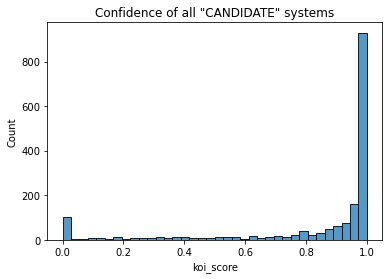

In [7]:
sns.histplot(data.koi_score[(data.koi_disposition=='CANDIDATE') & (data.koi_pdisposition=='CANDIDATE')])
plt.title('Confidence of all "CANDIDATE" systems')

# Now look at the raw transit data...

### kepid 6022556 is a high score system with 1 confirmed transiting planet.

In [8]:
sysid = 6022556
obsq1 = fits.open('../data/6022556/kplr006022556-2009166043257_llc.fits')
obsq1[1].data

FITS_rec([(131.5129356 , 0.00194178, 1105, 5978.79  , 3.0453346, 472.07498, 0.21199664, 8591.977, 4.4145975, 0, nan, nan, nan, nan, 834.30741223, 0.00069595, 928.18585874, 0.00070769,  0.01556019,  0.06613324),
          (131.53337009, 0.00194257, 1106, 5975.9224, 3.0460227, 472.0584 , 0.21168566, 8587.602, 4.4145446, 0, nan, nan, nan, nan, 834.30842788, 0.00069591, 928.18582389, 0.00070764,  0.0154387 ,  0.06597693),
          (131.55380449, 0.00194337, 1107, 5981.4287, 3.0467153, 472.4473 , 0.21208474, 8595.934, 4.4167666, 0, nan, nan, nan, nan, 834.30836736, 0.00069538, 928.18598199, 0.000707  ,  0.01550088,  0.06575003),
          ...,
          (164.94336159, 0.00300377, 2741, 5827.572 , 3.0238037, 442.87503, 0.21117665, 8591.504, 4.380768 , 0, nan, nan, nan, nan, 834.29196646, 0.00069879, 928.10677943, 0.00072209, -0.01650147, -0.08044873),
          (164.96379557, 0.00300425, 2742, 5815.219 , 3.0227304, 443.07043, 0.21156725, 8576.702, 4.3807034, 0, nan, nan, nan, nan, 834.29145

### load more data from previous quarters (Q0,Q1,Q2 and Q3) and plot...

In [9]:
# load more data
obsq2 = fits.open('../data/6022556/kplr006022556-2009259160929_llc.fits')
obsq3 = fits.open('../data/6022556/kplr006022556-2009350155506_llc.fits')
obsq4 = fits.open('../data/6022556/kplr006022556-2010078095331_llc.fits')

       kepid   kepler_name koi_disposition  koi_score  koi_period  \
158  6022556  Kepler-697 b       CONFIRMED        1.0    3.709871   

     koi_duration  
158        3.0694  


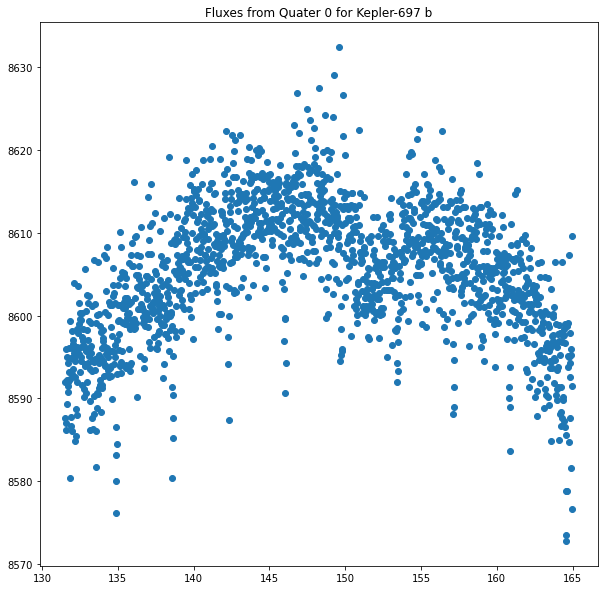

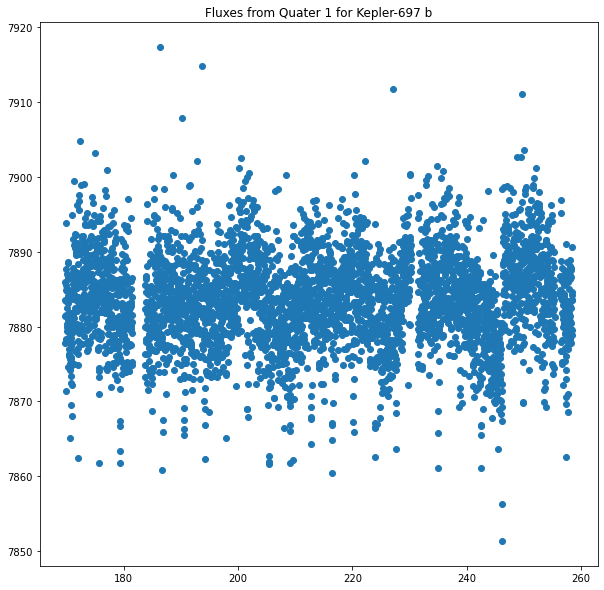

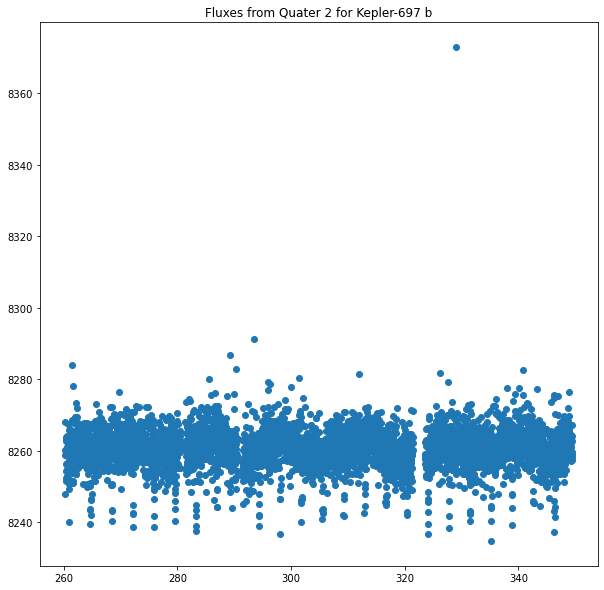

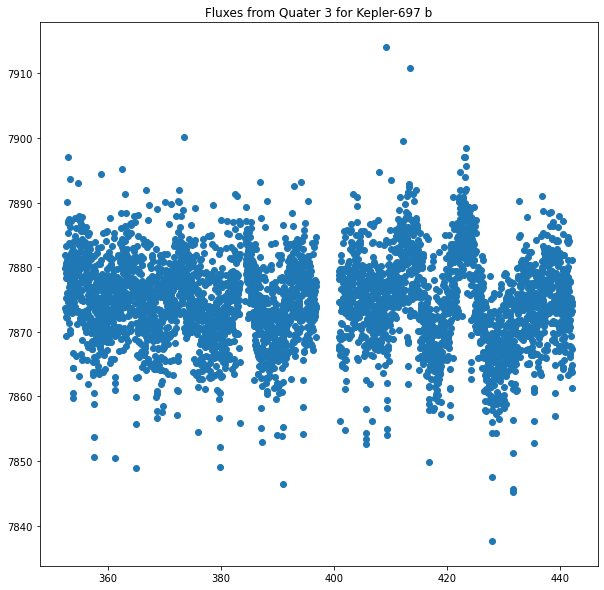

In [10]:
print(data[data.kepid==sysid][['kepid','kepler_name','koi_disposition','koi_score','koi_period','koi_duration']])

plt.figure(figsize=[10,10])
plt.scatter(obsq1[1].data.TIME,obsq1[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 0 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

plt.figure(figsize=[10,10])
plt.scatter(obsq2[1].data.TIME,obsq2[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 1 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

plt.figure(figsize=[10,10])
plt.scatter(obsq3[1].data.TIME,obsq3[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 2 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

plt.figure(figsize=[10,10])
plt.scatter(obsq4[1].data.TIME,obsq4[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 3 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

## Try folding data back on itself to get more resolved transits...

In [11]:
print(data[data.kepid==sysid][['kepid','kepler_name','koi_disposition','koi_score','koi_period','koi_duration']])

       kepid   kepler_name koi_disposition  koi_score  koi_period  \
158  6022556  Kepler-697 b       CONFIRMED        1.0    3.709871   

     koi_duration  
158        3.0694  


## fold the data back on itself, given the planet's orbital period, to give a more resolved transit...

In [12]:
obsq3 = fits.open('../data/6022556/kplr006022556-2009350155506_llc.fits')

In [13]:
def clean_arrays(time,flux,fluxerr=None,verbose=False):
    if verbose:
        print('no. datapoints prior to cleaning: %i' %(len(time)))
    # make sure data x vals are in increasing numbers
    order = np.argsort(time)
    flux = flux[order]
    time = time[order]
    if isinstance(fluxerr,np.ndarray):
        fluxerr = fluxerr[order]

    # ensure no nans before fitting
    mask = ~np.isnan(flux) & ~np.isnan(time)
    flux = flux[mask]
    time = time[mask]
    if verbose:
        print('no. datapoints after cleaning: %i' %(len(time)))
    if isinstance(fluxerr,np.ndarray):
        fluxerr = fluxerr[mask]
        return time, flux, fluxerr
    else: 
        return time, flux

def fold_data(obs,sysid,df,planetid=None):
    """
    fold the data back on itself given the planet's orbital period.
    """
    times = obs[1].data.TIME
    flux = obs[1].data.PDCSAP_FLUX
    if planetid:
        period = df[df.kepid==sysid]['koi_period'].iloc[planetid]
    else:
        period = df[df.kepid==sysid]['koi_period'].iloc[0]
    
    times -= times[0]
    times = np.mod(times,period)
    
    plt.scatter(times,flux,s=0.5)
    #plt.ylim([8230,8290])

    return times, flux

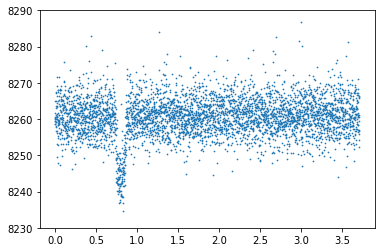

In [14]:
times, flux = fold_data(obsq3,6022556,data)
plt.ylim([8230,8290])

times = times[~np.isnan(flux)]
flux = flux[~np.isnan(flux)]

## bin this folded data, calculate mean flux in each bin

In [15]:
def bin_lightcurve(times,flux,statistic='mean',bins=1000,plot=False):
    binned = binned_statistic(times, flux, statistic, bins=bins)
    if plot:
        plt.scatter(binned[1][:-1],binned[0],s=0.5)
        plt.title('Binned data by %s' %statistic)
        plt.show()
    return binned[1][:-1], binned[0]

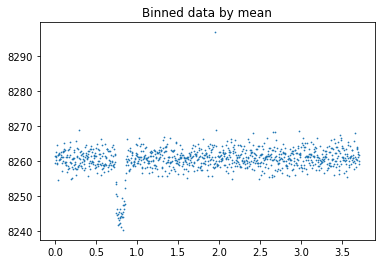

In [16]:
times,fluxes = bin_lightcurve(times,flux,statistic='mean',bins=1000,plot=True)

### System 7935997 is a 'confirmed' system with a koi_score of 0 (i.e. low confidence detection)...or is it a false positive? Not sure...

In [17]:
sysid=7935997
obsq1 = fits.open('../data/7935997/kplr007935997-2009131105131_llc.fits')
obsq2 = fits.open('../data/7935997/kplr007935997-2009166043257_llc.fits')
obsq3 = fits.open('../data/7935997/kplr007935997-2009259160929_llc.fits')
obsq4 = fits.open('../data/7935997/kplr007935997-2009350155506_llc.fits')

In [18]:
print(data[data.kepid==sysid][['kepid','kepler_name','koi_disposition','koi_score','koi_period','koi_duration']])

        kepid    kepler_name koi_disposition  koi_score  koi_period  \
6743  7935997            NaN  FALSE POSITIVE        NaN  322.556630   
9083  7935997  Kepler-1629 b       CONFIRMED        0.0    3.875943   

      koi_duration  
6743         3.740  
9083         2.314  


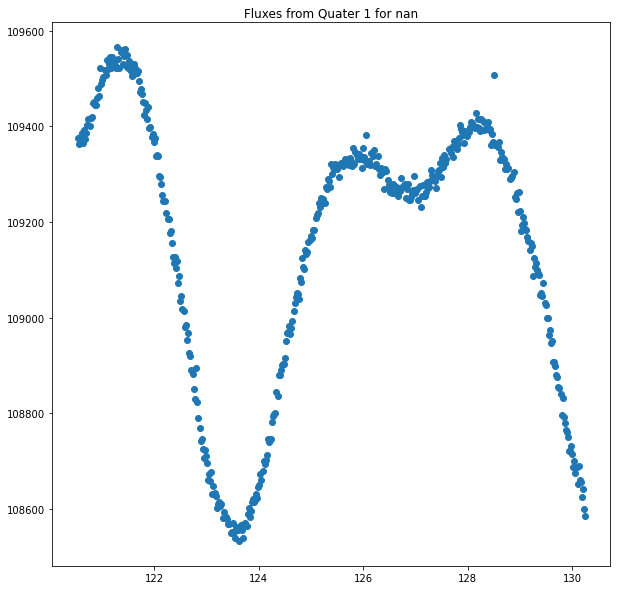

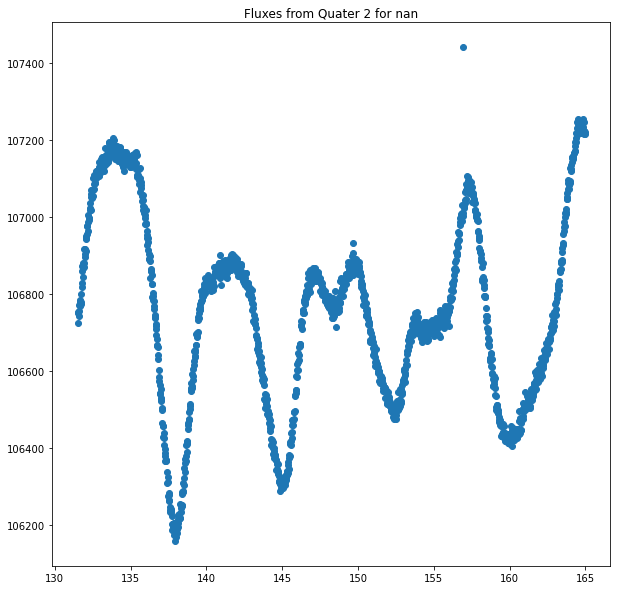

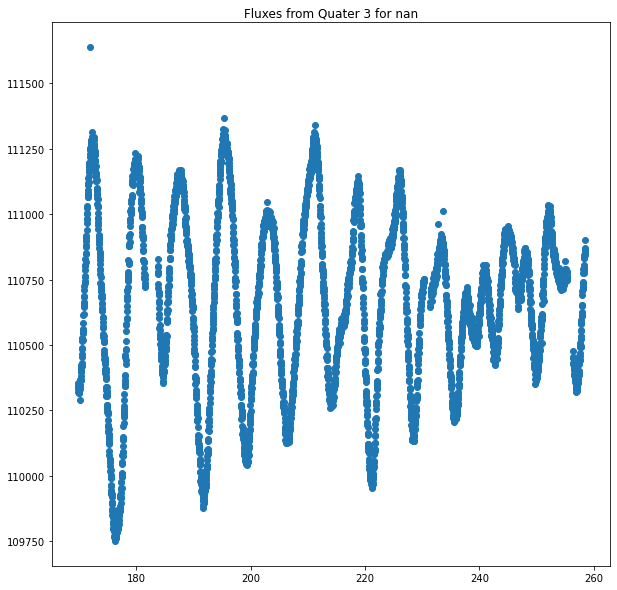

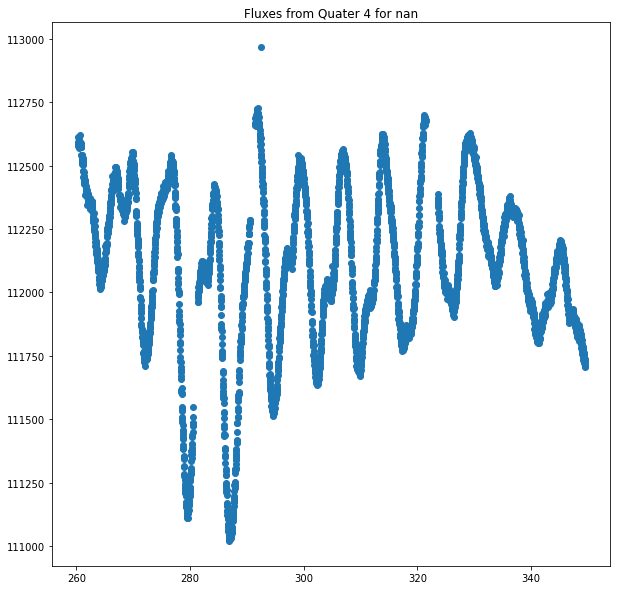

In [19]:
plt.figure(figsize=[10,10])
plt.scatter(obsq1[1].data.TIME,obsq1[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 1 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

plt.figure(figsize=[10,10])
plt.scatter(obsq2[1].data.TIME,obsq2[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 2 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

plt.figure(figsize=[10,10])
plt.scatter(obsq3[1].data.TIME,obsq3[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 3 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

plt.figure(figsize=[10,10])
plt.scatter(obsq4[1].data.TIME,obsq4[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 4 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

# Some of the systems have multiple detected planets...

938 systems have more than 1 planets
277 systems have more than 2 planets
98 systems have more than 3 planets
30 systems have more than 4 planets
5 systems have more than 5 planets


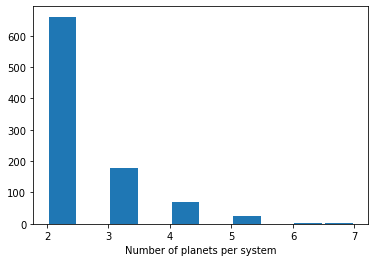

In [20]:
nplanets = data.groupby(data.kepid).count()

print('%i systems have more than 1 planets' %(nplanets.kepoi_name>1).sum())
print('%i systems have more than 2 planets' %(nplanets.kepoi_name>2).sum())
print('%i systems have more than 3 planets' %(nplanets.kepoi_name>3).sum())
print('%i systems have more than 4 planets' %(nplanets.kepoi_name>4).sum())
print('%i systems have more than 5 planets' %(nplanets.kepoi_name>5).sum())

plt.hist(nplanets.kepoi_name[nplanets.kepoi_name>1],rwidth=0.9)
plt.xlabel('Number of planets per system')
plt.show()

### kepid 1432789 has 2 confirmed planets...lets see what this transit data looks like...

In [21]:
data[data.kepid == 1432789]

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_kepmag
438,1432789,K00992.01,Kepler-745 b,CONFIRMED,CANDIDATE,0.848,0,0,0,0,...,5782.0,78.0,-78.0,4.28,0.137,-0.112,1.22,0.196,-0.176,15.214
7570,1432789,K00992.02,NaN,CANDIDATE,CANDIDATE,0.961,0,0,0,0,...,5782.0,78.0,-78.0,4.28,0.137,-0.112,1.22,0.196,-0.176,15.214


In [22]:
print('Transit period (days)...')
print(data[data.kepid == 1432789]['koi_period'])
print('')
print('Transit duration (hours)...')
print(data[data.kepid == 1432789]['koi_duration'])

Transit period (days)...
438     9.931463
7570    4.578344
Name: koi_period, dtype: float64

Transit duration (hours)...
438     5.678
7570    3.987
Name: koi_duration, dtype: float64


## quite hard to tell where the transit is in this system actually...

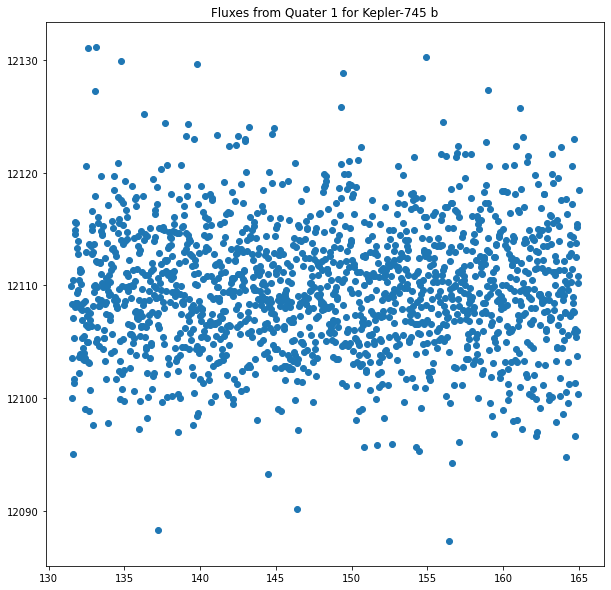

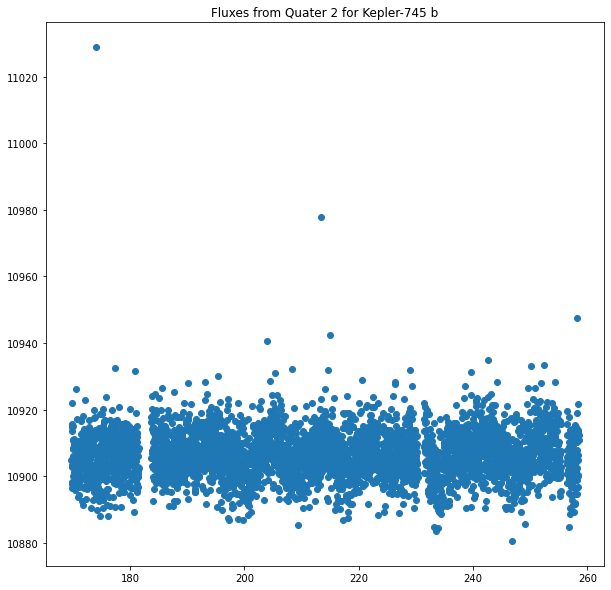

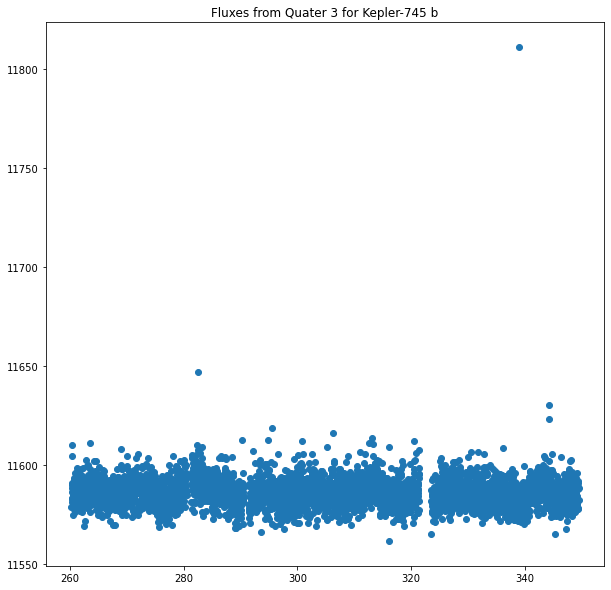

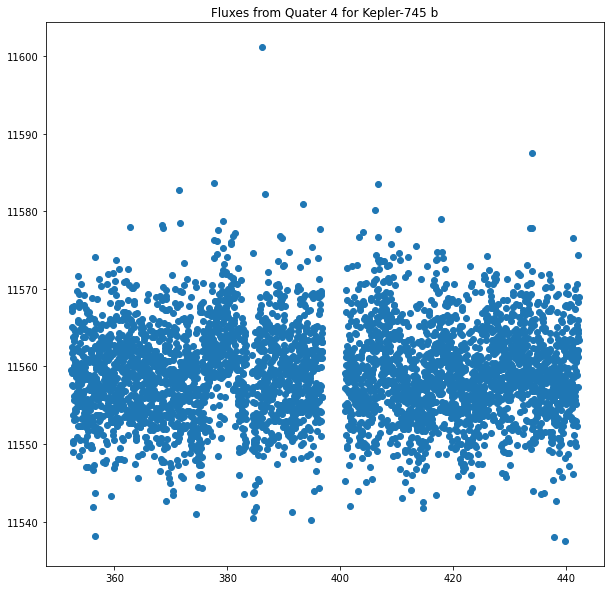

In [23]:
sysid = 1432789
obs = fits.open('../data/1432789/kplr001432789-2009166043257_llc.fits')

plt.figure(figsize=[10,10])
plt.scatter(obs[1].data.TIME,obs[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 1 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

obs = fits.open('../data/1432789/kplr001432789-2009259160929_llc.fits')

plt.figure(figsize=[10,10])
plt.scatter(obs[1].data.TIME,obs[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 2 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

obs = fits.open('../data/1432789/kplr001432789-2009350155506_llc.fits')

plt.figure(figsize=[10,10])
plt.scatter(obs[1].data.TIME,obs[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 3 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

obs = fits.open('../data/1432789/kplr001432789-2010078095331_llc.fits')

plt.figure(figsize=[10,10])
plt.scatter(obs[1].data.TIME,obs[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 4 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

# How does it look when i fold it?

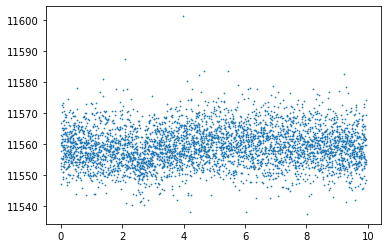

In [24]:
times, flux = fold_data(obs,1432789,data,planetid=0)

times, flux = clean_arrays(times,flux)

# ...and then bin the folded data...

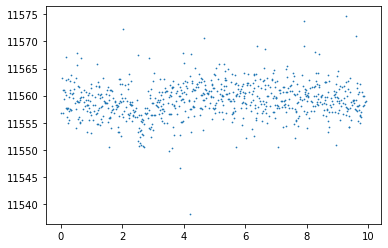

In [25]:
times, flux = bin_lightcurve(times,flux)
plt.scatter(times, flux, s=0.5)
plt.show()

# Now attempt to remove stellar variability from Kepler 7935997 data...

# Try fitting spline to data to remove stellar variability (not finished this yet)

In [26]:
sysid = 7935997
obs = fits.open('../data/7935997/kplr007935997-2009131105131_llc.fits')

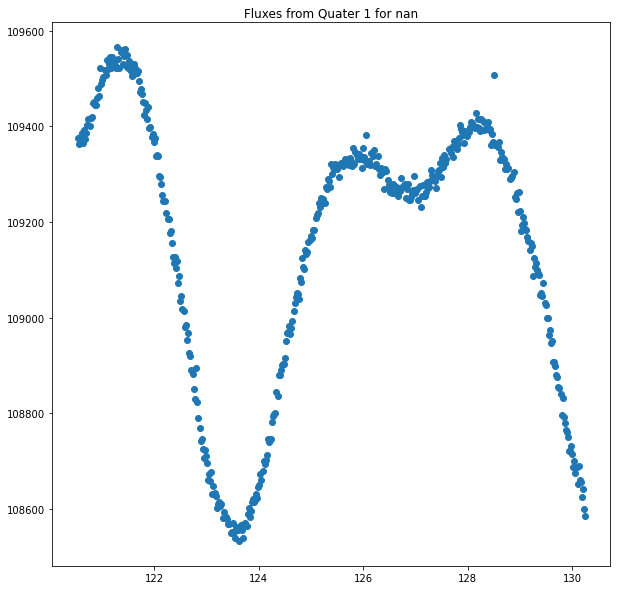

In [27]:
plt.figure(figsize=[10,10])
plt.scatter(obs[1].data.TIME,obs[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 1 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

# function for fitting a spline...

In [28]:
def fit_spline(time,flux,plot=False,nknots=None):
    # make sure data x vals are in increasing numbers
    order = np.argsort(time)
    flux = flux[order]
    time = time[order]
    
    # ensure no nans before fitting
    mask = ~np.isnan(flux) & ~np.isnan(time)
    flux = flux[mask]
    time = time[mask]

    if not nknots:
        # knot every 1.5 days...
        nknots = int((time[-1]-time[0])/0.1)
        print('default of 1 knot per 0.1 days...')
    knots = np.linspace(time[0],time[-1],nknots)
    
    # fit spline...need to check this is correct spline to be fitting
    tck = LSQUnivariateSpline(time,flux,t=knots[1:-1])
    
    if plot:
        y = tck(time)

        plt.scatter(time,flux,s=0.5)
        plt.title('Raw data')
        plt.show()

        plt.plot(time,y)
        plt.title('Spline fit')
        plt.show()
    return tck

default of 1 knot per 0.1 days...


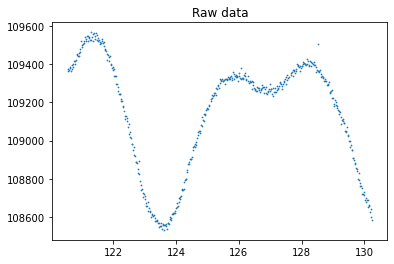

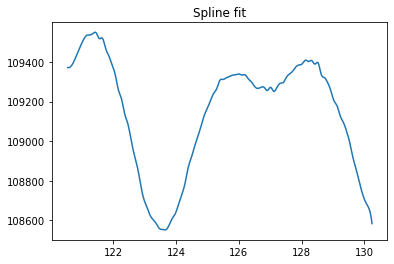

In [29]:
obs = fits.open('../data/7935997/kplr007935997-2009131105131_llc.fits')

# use fit_spline function to fit and plot results
tck = fit_spline(obs[1].data.TIME,obs[1].data.PDCSAP_FLUX,plot=True)

# Try doing the same with kep 1432789...

In [30]:
sysid = 1432789
obs = fits.open('../data/1432789/kplr001432789-2010078095331_llc.fits')

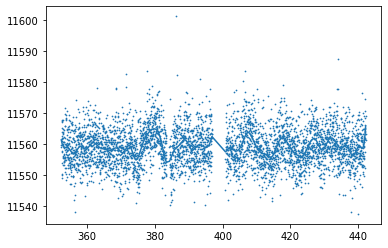

In [31]:
time = obs[1].data.TIME
flux = obs[1].data.PDCSAP_FLUX

time,flux = clean_arrays(time,flux)

tck = fit_spline(time,flux,nknots=50)
y = tck(time)

plt.scatter(time, flux, s=0.5)
plt.plot(time,y)

# functions for automated removal of stellar variability...

In [42]:
def RMSE(y1, y2):
    return np.sqrt(np.mean((y1-y2)**2))

def cross_validation(time,flux):
    """
    fit spline to half of the data, then minimise RMSE 
        when using the other half of the data.
    
    bounds: np.array([min, max])
        upper and lower bounds of knots range
    returns:
        nopt: optimal number of knots
        errmin: RMSE of optimal fit
    """
    errors = []
    # may or may not want this random seed...
    np.random.seed(111)
    
    # initial guess a knot every 1.5 days
    n0 = (time[-1]-time[0])/1.5
    # define bounds as +/- 25 knots either side of n0
    bounds = np.clip(np.linspace(n0-25,n0+25,50).astype(int),1,500)
    for nknots in bounds:
        # randomly mask half the data before fitting
        mask = time<np.mean(time)
        np.random.shuffle(mask)
        #force mask[0] and mask[-1] to True
        mask[0] = True
        mask[-1] = True
        # fit spline to masked data
        try:
            spl = fit_spline(time[mask],flux[mask],nknots=nknots)
            # predict for other half of data and calc errors
            errors.append(RMSE(flux[~mask],spl(time[~mask])))
        except:
            # if fit fails for whatever reason append error=inf
            # usually this is because number of knots exceeds the max allowed
            errors.append(np.inf)
    errors = np.asarray(errors)
    
    # optimal number of knots 
    nopt = bounds[errors==np.min(errors)][0]
    return nopt, np.min(errors)

In [33]:
def remove_stellar_activity(obs, verbose=False, plot=False):
    
    time = obs[1].data.TIME
    flux = obs[1].data.PDCSAP_FLUX
    fluxerr = obs[1].data.PDCSAP_FLUX_ERR
    
    time,flux,fluxerr = clean_arrays(time,flux,fluxerr)
    
    # get optimal number of knots using cross validation
    nopt, errmin = cross_validation(time,flux)
    if verbose:
        print('optimal number of knots found: %i, err: %.3f' %(nopt, errmin))
    spl = fit_spline(time, flux, nknots=nopt)
    
    flux -= spl(time)
    fluxerr -= spl(time)

    if plot:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
        ax1.scatter(time,flux+spl(time),s=0.5)
        ax1.plot(time,spl(time),c='red')
        ax1.set_title('data with spline overplotted')

        ax2.scatter(time,flux,s=0.5)
        ax2.set_title('data with spline removed')
        plt.show()
    
    return time,flux,fluxerr

# new folding function...

In [34]:
def fold_data_new(time,flux,period,plot=True,bin=False):
    time -= time[0]
    time = np.mod(time,period)
    if plot:
        if not bin:
            plt.scatter(time,flux,s=0.5)
            plt.title('folded data on period %s days' %period)
            plt.show()
        else:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
            ax1.scatter(time,flux,s=0.5)
            ax1.set_title('folded data on period %s days' %period)

            time,flux = bin_lightcurve(time,flux,statistic='mean',bins=1000)
            ax2.scatter(time,flux,s=2.0)
            ax2.set_title('folded + binned data on period %s days' %period)
            plt.show()
        
    return time,flux

optimal number of knots found: 61, err: 5.755


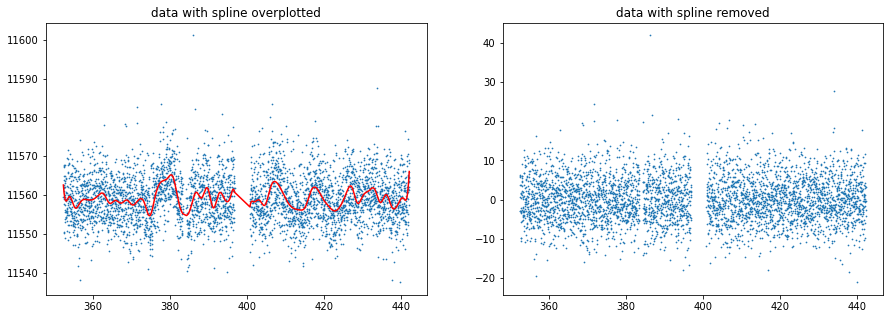

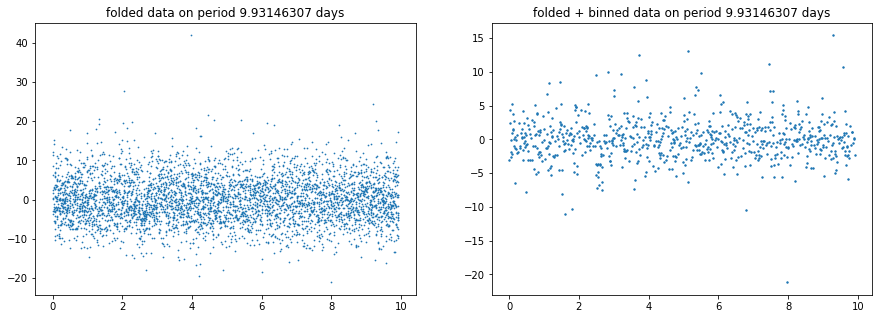

In [35]:
obs = fits.open('../data/1432789/kplr001432789-2010078095331_llc.fits')
time,flux,fluxerr = remove_stellar_activity(obs, plot=True, verbose=True)

period = data[data.kepid==sysid]['koi_period'].iloc[0]
time,flux = fold_data_new(time,flux,period,plot=True, bin=True)

# also remove stellar activity from kepler 7935997

In [36]:
sysid = 7935997
obs = fits.open('../data/7935997/kplr007935997-2009131105131_llc.fits')

optimal number of knots found: 25, err: 14.099


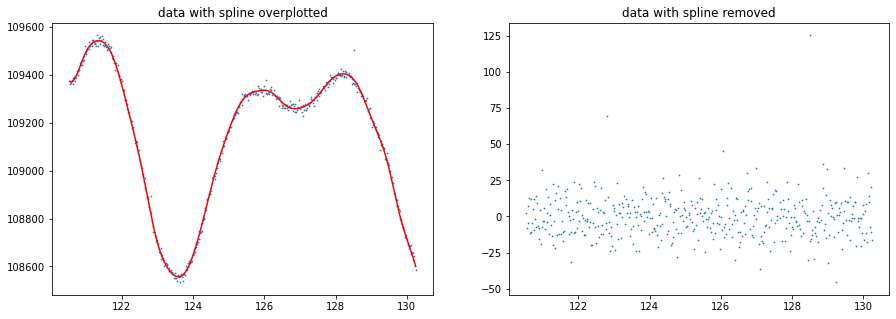

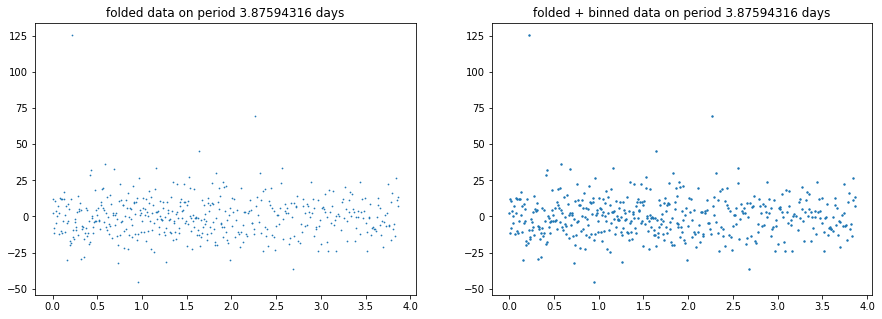

In [37]:
time,flux,fluxerr = remove_stellar_activity(obs,verbose=True,plot=True)

period = data[data.kepid==sysid]['koi_period'].iloc[1]
time,flux = fold_data_new(time,flux,period,plot=True,bin=True)

# do this again but with Quarter 4 observations which have more data 

optimal number of knots found: 84, err: 18.529


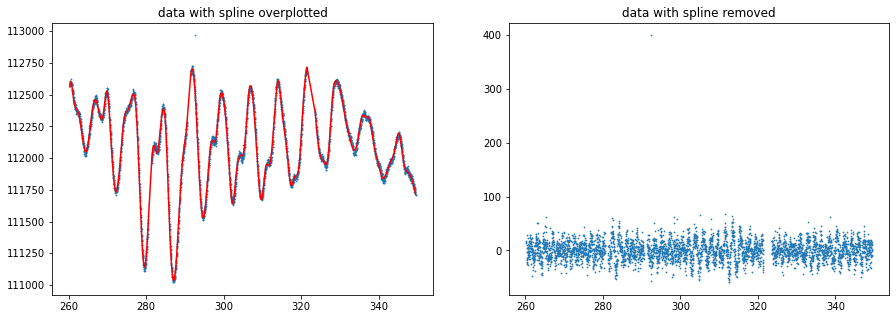

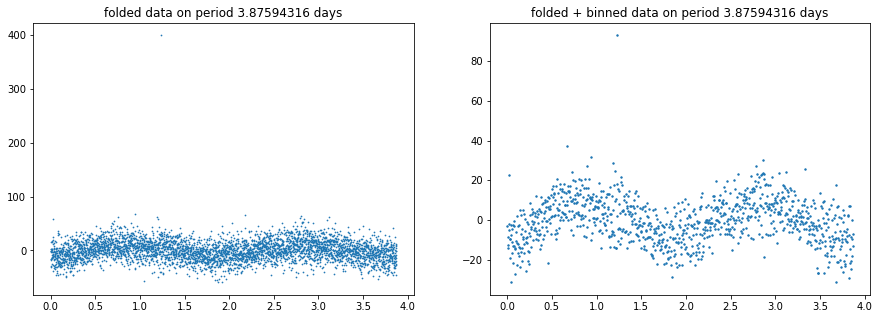

In [38]:
obs = fits.open('../data/7935997/kplr007935997-2009350155506_llc.fits')
time,flux,fluxerr = remove_stellar_activity(obs,plot=True,verbose=True)

period = data[data.kepid==sysid]['koi_period'].iloc[1]
time,flux = fold_data_new(time,flux,period,plot=True, bin=True)

# Remove stellar noise, fold data and bin final lightcurve for koi 6022556

optimal number of knots found: 57, err: 5.635


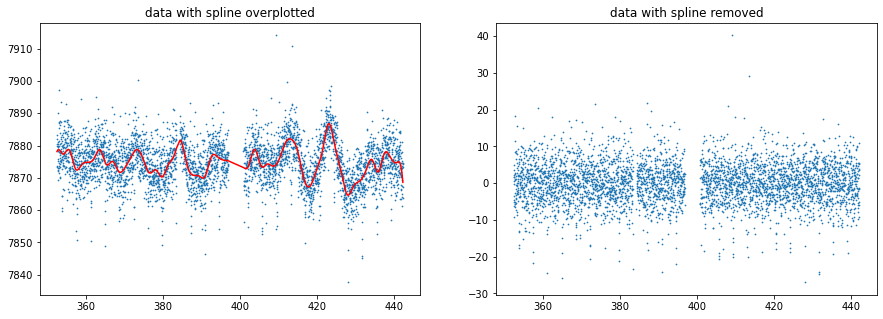

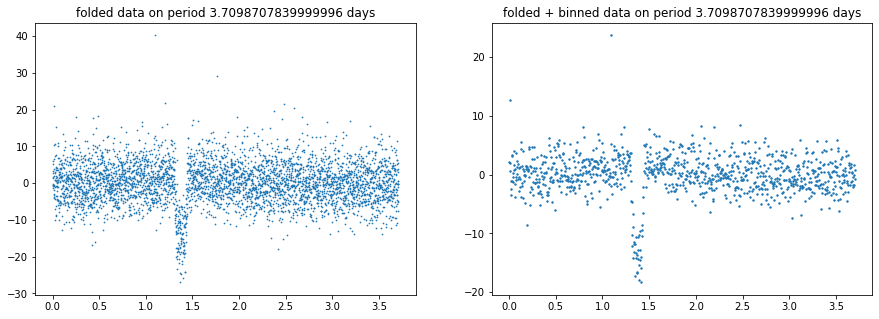

In [39]:
sysid = 6022556
obs = fits.open('../data/6022556/kplr006022556-2010078095331_llc.fits')

time,flux,fluxerr = remove_stellar_activity(obs,plot=True,verbose=True)

period = data[data.kepid==sysid]['koi_period'].iloc[0]
time,flux = fold_data_new(time,flux,period,plot=True, bin=True)

# this looks good!

## Check how this looks for all of the systems in the example data...

In [40]:
import os
import glob
import numpy as np
import random

Fitting for KOI 1432789
optimal number of knots found: 28, err: 5.713


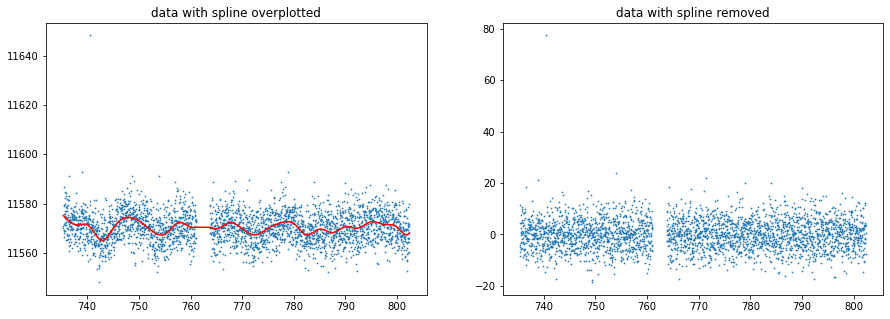

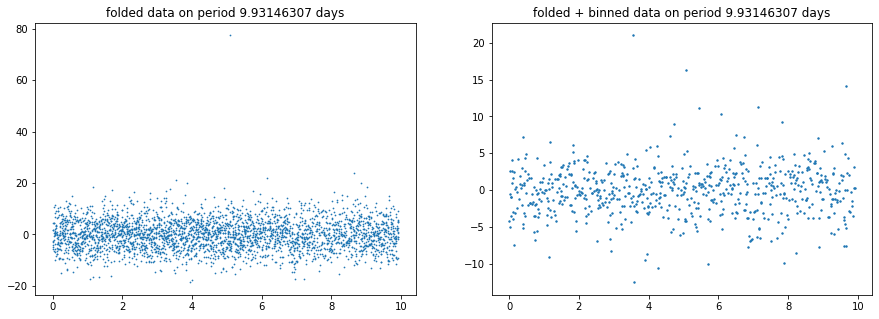

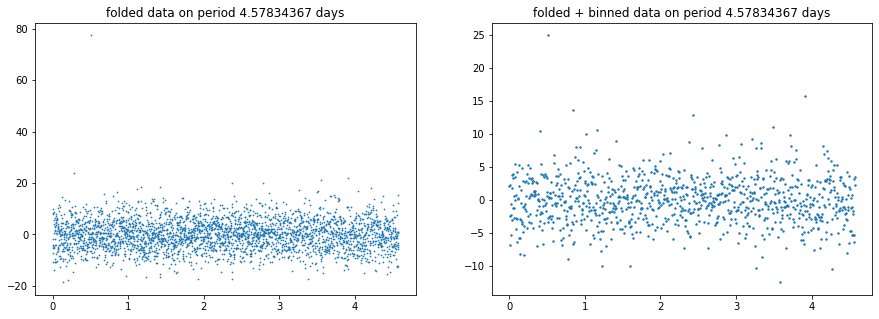

Fitting for KOI 6022556
optimal number of knots found: 48, err: 5.373


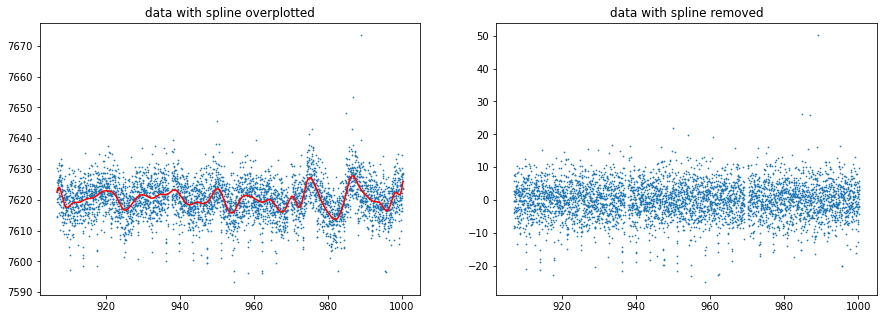

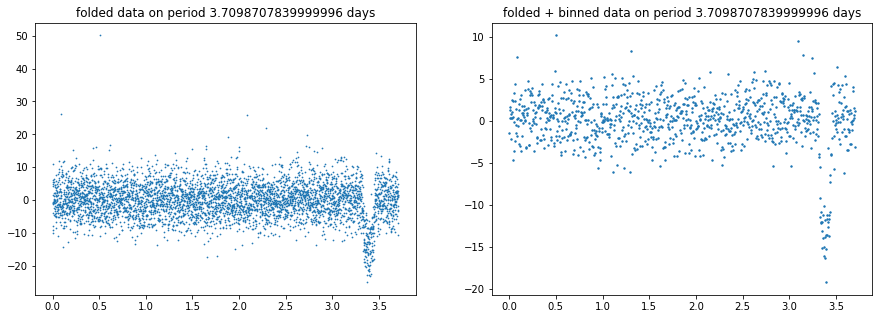

Fitting for KOI 7935997
optimal number of knots found: 82, err: 21.050


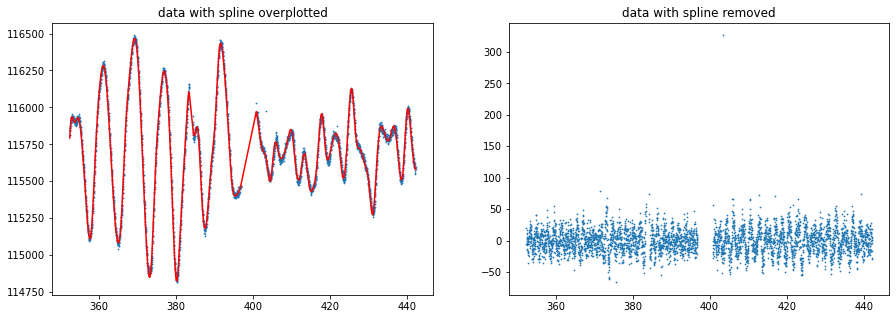

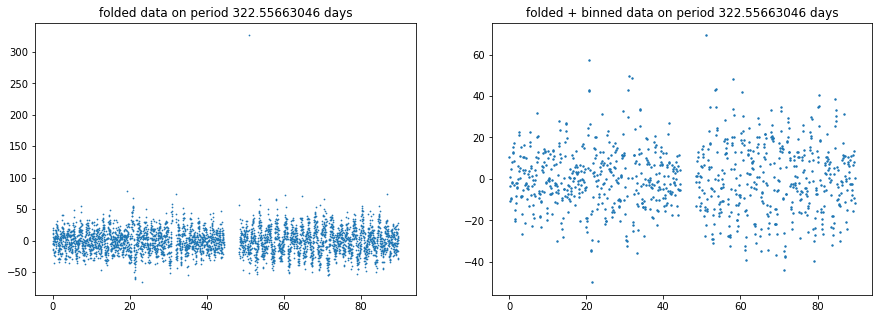

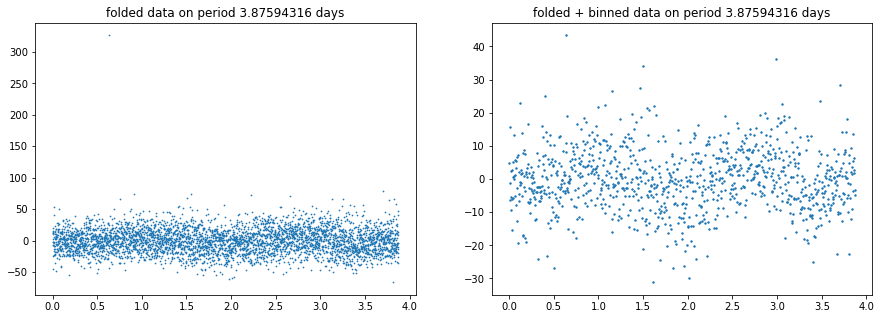

Fitting for KOI 8939211
optimal number of knots found: 84, err: 6.300


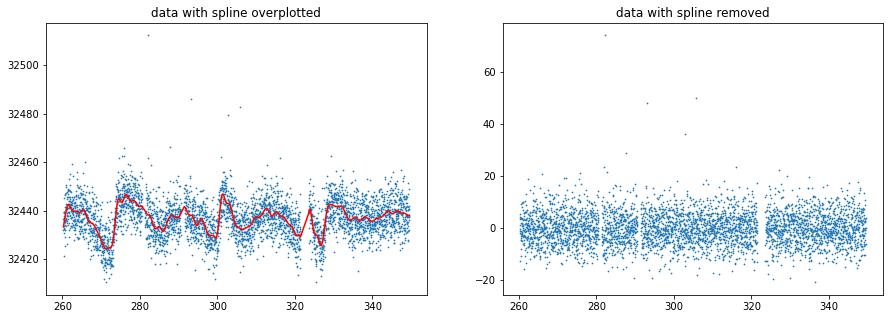

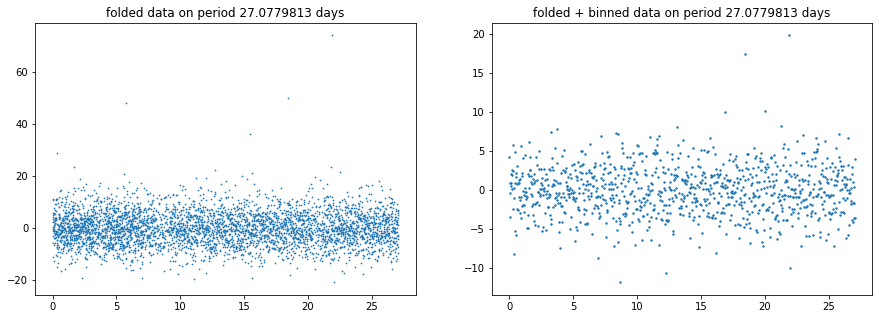

"\n\nfor f in fitsfiles:\n    sysid = int(f.split('data/')[1].split('/kplr')[0])\n    print('Fitting for KOI %i' %sysid)\n    try:\n        obs = fits.open(f)\n    except:\n        # some aren't opening?\n        continue\n\n    time,flux,fluxerr = remove_stellar_activity(obs,plot=True,verbose=True)\n\n    # for each planet in the system...\n    for period in data[data.kepid==sysid]['koi_period']:\n        fold_data_new(time,flux,period,plot=True,bin=True)\n\n"

In [45]:
fitsfiles = np.asarray(glob.glob('../data/*/*fits'))

# randomly select one observation per koi
koiid = [f.split('kplr')[1].split('-')[0].strip('0') for f in fitsfiles]
unique = np.unique(koiid)
mask = ['c' not in s for s in unique]
unique = unique[mask]

for id in unique:
    files = fitsfiles[[id in f for f in fitsfiles]]
    f = random.choice(files)
    
    sysid = int(f.split('data/')[1].split('/kplr')[0])
    print('Fitting for KOI %i' %sysid)
    
    try:
        obs = fits.open(f)
    except:
        # some aren't opening?
        f = random.choice(files)
        obs = fits.open(f)

    time,flux,fluxerr = remove_stellar_activity(obs,plot=True,verbose=True)

    # for each planet in the system...
    for period in data[data.kepid==sysid]['koi_period']:
        fold_data_new(time,flux,period,plot=True,bin=True)    

"""

for f in fitsfiles:
    sysid = int(f.split('data/')[1].split('/kplr')[0])
    print('Fitting for KOI %i' %sysid)
    try:
        obs = fits.open(f)
    except:
        # some aren't opening?
        continue

    time,flux,fluxerr = remove_stellar_activity(obs,plot=True,verbose=True)

    # for each planet in the system...
    for period in data[data.kepid==sysid]['koi_period']:
        fold_data_new(time,flux,period,plot=True,bin=True)

"""